In [1]:
from pyscf import gto, scf, ci
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# дрібний крок біля мінімуму
R1 = np.arange(0.25, 1.25, 0.05)  # щільна сітка

# великий крок далеко від мінімуму
R2 = np.arange(1.25, 4.0, 0.25)   # рідка сетка

# об'єднуємо в один масив
distances = np.concatenate([R1, R2])

In [3]:
basis= 'cc-PVDZ' 

In [4]:
def make_cisd(mf, nstates=4):
    obj = ci.CISD(mf)
    obj.nstates = nstates
    return obj

In [5]:
ci_scan = gto.M(verbose=0).apply(scf.RHF).apply(make_cisd).as_scanner()

In [6]:
# myci = ci.CISD(mf)
# myci.nstates = 15  
# myci.kernel()

In [7]:
energies = []

In [8]:
# Сканируем по R
for r in distances:
    mol = gto.M(
        atom=f'H 0 0 0; H 0 0 {r}',
        basis=basis,
        unit='Angstrom'
    )
    e_states = ci_scan(mol)  # массив энергий для всех состояний
    energies.append(e_states)

energies = np.array(energies)  # shape (len(R), nstates)

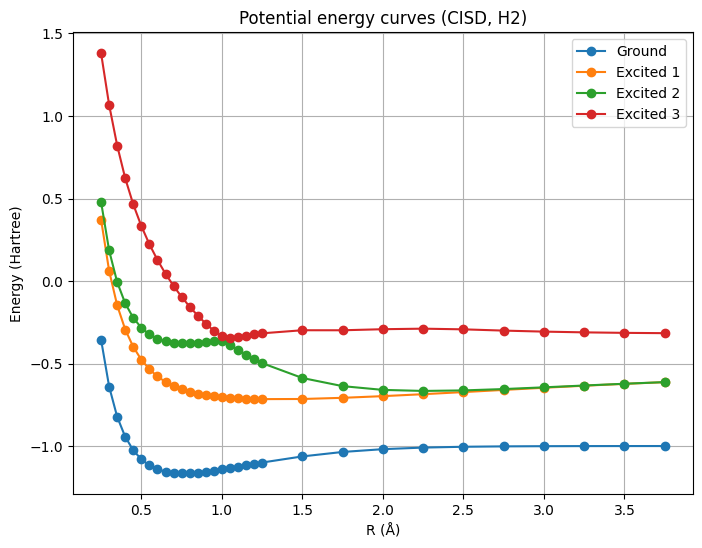

In [9]:
# --- Визуализация ---
plt.figure(figsize=(8,6))
labels = ["Ground"] + [f"Excited {i}" for i in range(1, energies.shape[1])]
for i in range(energies.shape[1]):
    plt.plot(distances, energies[:,i], marker="o", label=labels[i])

plt.xlabel("R (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Potential energy curves (CISD, H2)")
plt.legend()
plt.grid(True)
plt.show()